# Import các thư viện


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Đọc dữ liệu


In [ ]:
df = pd.read_csv("../../Data/Created Data/hotel_bookings_cleaned.csv")
df

,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,continent
0,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,0,3,0,0.00,0,0,Europe
1,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,0,4,0,0.00,0,0,Europe
2,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,...,0,0,0,0,0,0,75.00,0,0,Europe
3,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,...,0,0,0,0,0,0,75.00,0,0,Europe
4,2015-07-01,2015-07-03,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,0,0,0,0,0,0,98.00,0,1,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87360,2017-08-30,2017-09-06,City Hotel,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,...,0,0,0,0,0,0,96.14,0,0,Europe
87361,2017-08-31,2017-09-07,City Hotel,BB,FRA,Online TA,TA/TO,E,E,No Deposit,...,0,0,0,0,0,0,225.43,0,2,Europe
87362,2017-08-31,2017-09-07,City Hotel,BB,DEU,Online TA,TA/TO,D,D,No Deposit,...,0,0,0,0,0,0,157.71,0,4,Europe
87363,2017-08-31,2017-09-07,City Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,0,0,0,0,0,0,104.40,0,0,Europe


# chuyển 2 cột date thành kiểu datetime trước rồi tiếp tục làm việc


In [3]:
def change_df(df):
    format_year = "%Y-%m-%d"

    df["arrival_date"] = pd.to_datetime(df["arrival_date"], format=format_year)
    df["reservation_status_date"] = pd.to_datetime(
        df["reservation_status_date"], format=format_year
    )

change_df(df)


# I TỔNG QUAN VỀ TÌNH HÌNH ĐẶT PHÒNG KHÁCH SẠN LOẠI "CITY"

## 1. Tỷ lệ đặt phòng chia theo khách nội địa và quốc tế

In [4]:
hotel_data = df
city_hotel_data = hotel_data[hotel_data['hotel'] == 'City Hotel']

internal_customers = city_hotel_data[city_hotel_data['country'] == 'PRT']
foreign_customers = city_hotel_data[city_hotel_data['country'] != 'PRT']

total_customers = len(city_hotel_data)
internal_percentage = len(internal_customers) / total_customers * 100
foreign_percentage = len(foreign_customers) / total_customers * 100

internal_percentage, foreign_percentage


(24.729451413592958, 75.27054858640703)

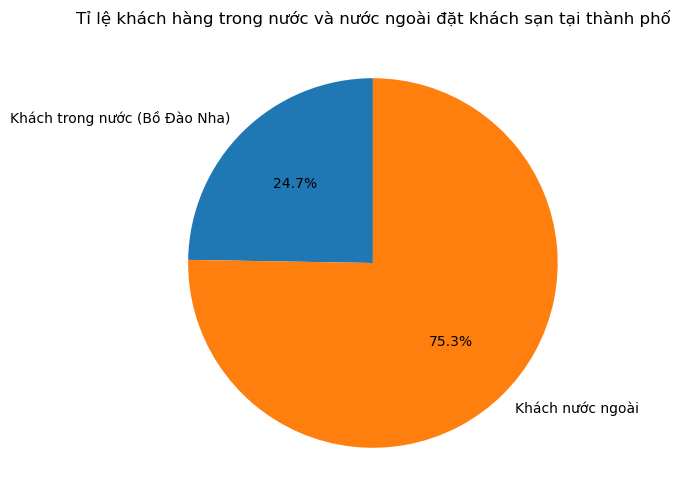

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie([internal_percentage, foreign_percentage], labels=['Khách trong nước (Bồ Đào Nha)', 'Khách nước ngoài'], autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ khách hàng trong nước và nước ngoài đặt khách sạn tại thành phố')
plt.show()

__Nhận xét__:
- Tỉ lệ khách nước ngoài đặt khách sạn loại City chiếm đa số so với khách nội địa.
- Nguyên nhân: khách nước ngoài yêu thích lựa chọn City Hotel vì địa điểm thuận tiện để đi khám phá các địa điểm trong thành phố. Còn với khách nội địa, họ thường chọn các loại khách sạn khác như Resort để trải nghiệm những nơi mới vì họ vốn dĩ đã ở trong thành phố 
- Chiến lược cho các khách sạn City: 

## 2. Tỷ lệ khách quốc tế đặt phòng

In [ ]:
foreign_nationalities = foreign_customers['country'].value_counts()

foreign_nationalities_percentage = (foreign_nationalities / len(foreign_customers)) * 100

# top 10 highest countries
top_countries = foreign_nationalities_percentage.head(20)

top_countries


FRA    18.436894
GBR    11.260634
DEU    11.106413
ESP     9.409980
ITA     6.581762
BEL     4.203771
BRA     3.947565
NLD     3.559524
USA     3.524700
CHE     2.872991
IRL     2.656584
AUT     1.942689
CHN     1.773544
SWE     1.470076
CN      1.221332
POL     1.159146
NOR     0.994975
RUS     0.965126
ISR     0.942739
DNK     0.800955
Name: country, dtype: float64

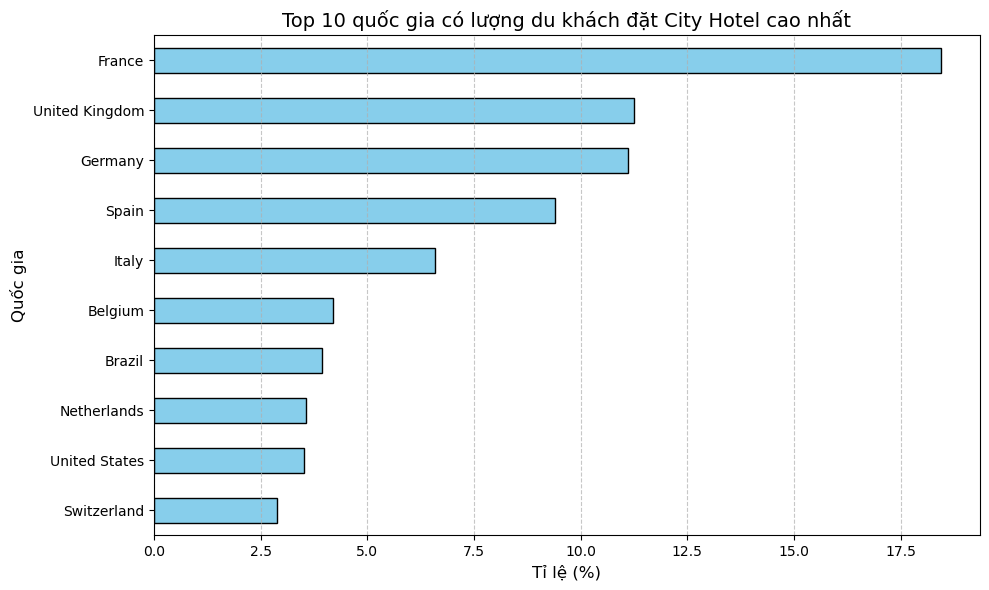

In [7]:
# top 10 countries with highest percentage of foreign customers
plt.figure(figsize=(10, 6))
top_10_countries = top_countries.sort_values(ascending=True).tail(10)
top_10_countries.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

mapping = {
    'GBR': 'United Kingdom',
    'FRA': 'France',
    'DEU': 'Germany',
    'ESP': 'Spain',
    'ITA': 'Italy',
    'IRL': 'Ireland',
    'BEL': 'Belgium',
    'BRA': 'Brazil',
    'NLD': 'Netherlands',
    'USA': 'United States',
    'CHE': 'Switzerland',
}
plt.yticks(ticks=range(10), labels=[mapping.get(country, country) for country in top_10_countries.index])

plt.title('Top 10 quốc gia có lượng du khách đặt City Hotel cao nhất', fontsize=14)
plt.xlabel('Tỉ lệ (%)', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## 3. Doanh thu phân theo loại khách đặt phòng

In [8]:
city_hotel_data.loc[:, 'total_nights'] = (
    city_hotel_data['stays_in_weekend_nights'] + city_hotel_data['stays_in_week_nights']
)

city_hotel_data.loc[:, 'revenue'] = city_hotel_data['adr'] * city_hotel_data['total_nights']

customer_revenue_analysis = city_hotel_data.groupby('customer_type').agg(
    total_revenue=('revenue', 'sum'),
    average_revenue=('revenue', 'mean'),
    total_bookings=('revenue', 'count')
).sort_values(by='total_revenue', ascending=False)

customer_revenue_analysis


C:\Users\Admin\AppData\Local\Temp\ipykernel_15804\917620408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel_data.loc[:, 'total_nights'] = (
C:\Users\Admin\AppData\Local\Temp\ipykernel_15804\917620408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel_data.loc[:, 'revenue'] = city_hotel_data['adr'] * city_hotel_data['total_nights']


,total_revenue,average_revenue,total_bookings
customer_type,,,
Transient,16345715.38,366.233092,44632
Transient-Party,1864524.75,264.997833,7036
Contract,498664.66,338.997050,1471
Group,60504.50,223.263838,271


In [ ]:
# Calculate the raw number of bookings and percentages
total_bookings = city_hotel_data['customer_type'].value_counts()
percentage_bookings = (total_bookings / total_bookings.sum()) * 100

# total revenue (raw amount) and percentages
total_revenue = city_hotel_data.groupby('customer_type')['revenue'].sum()
percentage_revenue = (total_revenue / total_revenue.sum()) * 100

# all insights into a DataFrame for comparison
detailed_customer_analysis = pd.DataFrame({
    'total_bookings': total_bookings,
    'percentage_bookings': percentage_bookings,
    'total_revenue': total_revenue,
    'percentage_revenue': percentage_revenue
}).sort_values(by='total_revenue', ascending=False)

detailed_customer_analysis


,total_bookings,percentage_bookings,total_revenue,percentage_revenue
Transient,44632,83.564875,16345715.38,87.087000
Transient-Party,7036,13.173563,1864524.75,9.933849
Contract,1471,2.754166,498664.66,2.656795
Group,271,0.507396,60504.50,0.322357


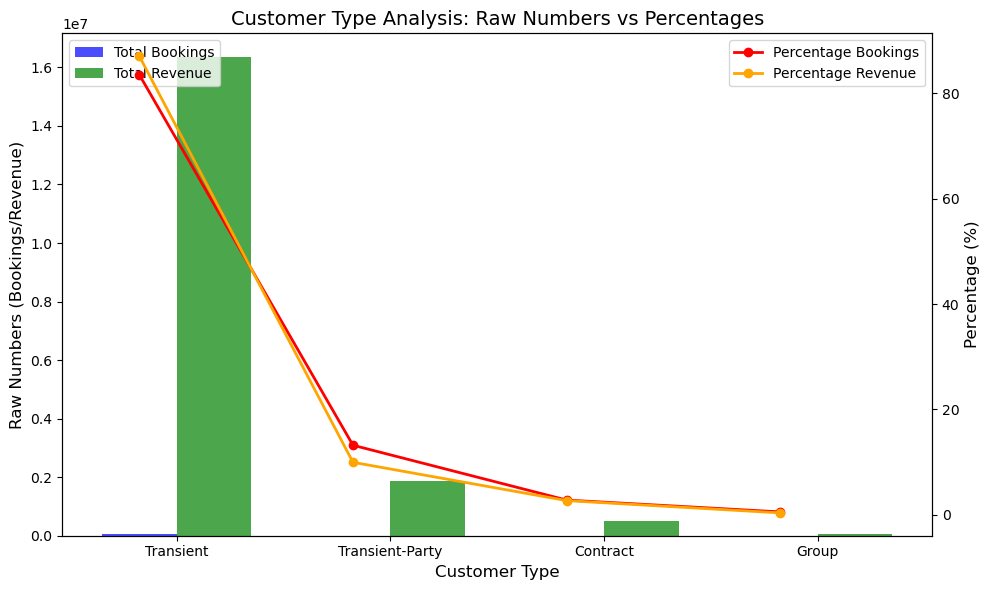

In [10]:
import matplotlib.pyplot as plt

# Define the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for raw numbers
bar_width = 0.35
x = range(len(detailed_customer_analysis))
ax1.bar(x, detailed_customer_analysis['total_bookings'], bar_width, label='Total Bookings', color='blue', alpha=0.7)
ax1.bar([p + bar_width for p in x], detailed_customer_analysis['total_revenue'], bar_width, label='Total Revenue', color='green', alpha=0.7)

# Set labels and ticks for ax1 (left y-axis)
ax1.set_xlabel('Customer Type', fontsize=12)
ax1.set_ylabel('Raw Numbers (Bookings/Revenue)', fontsize=12)
ax1.set_xticks([p + bar_width / 2 for p in x])
ax1.set_xticklabels(detailed_customer_analysis.index)
ax1.legend(loc='upper left')

# Add the second y-axis
ax2 = ax1.twinx()
ax2.plot(x, detailed_customer_analysis['percentage_bookings'], label='Percentage Bookings', color='red', marker='o', linewidth=2)
ax2.plot(x, detailed_customer_analysis['percentage_revenue'], label='Percentage Revenue', color='orange', marker='o', linewidth=2)

# Set labels for ax2 (right y-axis)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.legend(loc='upper right')

# Add a title
plt.title('Customer Type Analysis: Raw Numbers vs Percentages', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


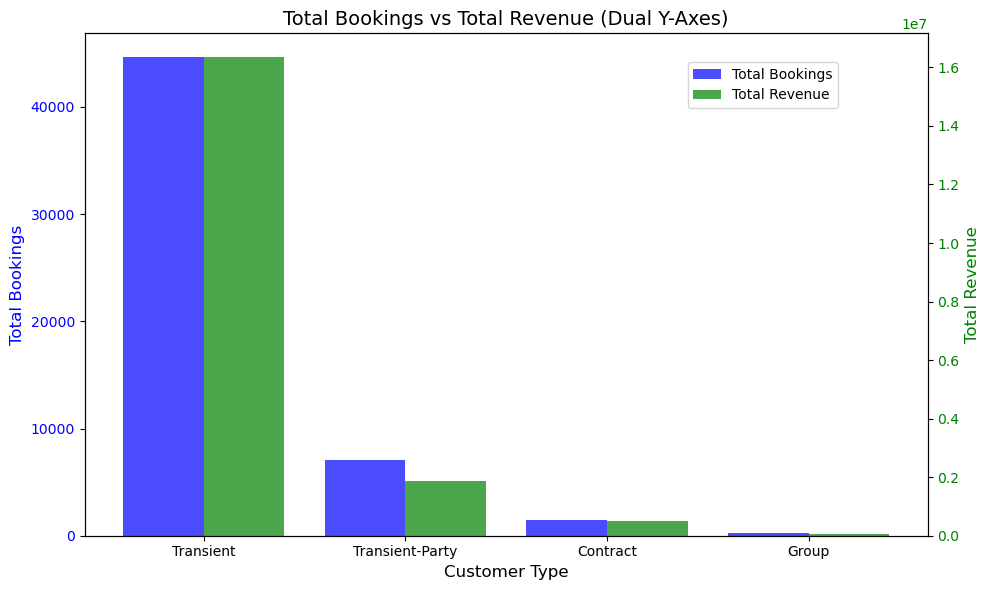

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar for total bookings
x = range(len(detailed_customer_analysis))
bar_width = 0.4
ax1.bar(x, detailed_customer_analysis['total_bookings'], bar_width, color='blue', alpha=0.7, label='Total Bookings')
ax1.set_ylabel('Total Bookings', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary Y-axis for revenue
ax2 = ax1.twinx()
ax2.bar([p + bar_width for p in x], detailed_customer_analysis['total_revenue'], bar_width, color='green', alpha=0.7, label='Total Revenue')
ax2.set_ylabel('Total Revenue', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Labels, title, and legend
ax1.set_xlabel('Customer Type', fontsize=12)
ax1.set_xticks([p + bar_width / 2 for p in x])
ax1.set_xticklabels(detailed_customer_analysis.index)
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.9), fontsize=10)
plt.title('Total Bookings vs Total Revenue (Dual Y-Axes)', fontsize=14)
plt.tight_layout()
plt.show()


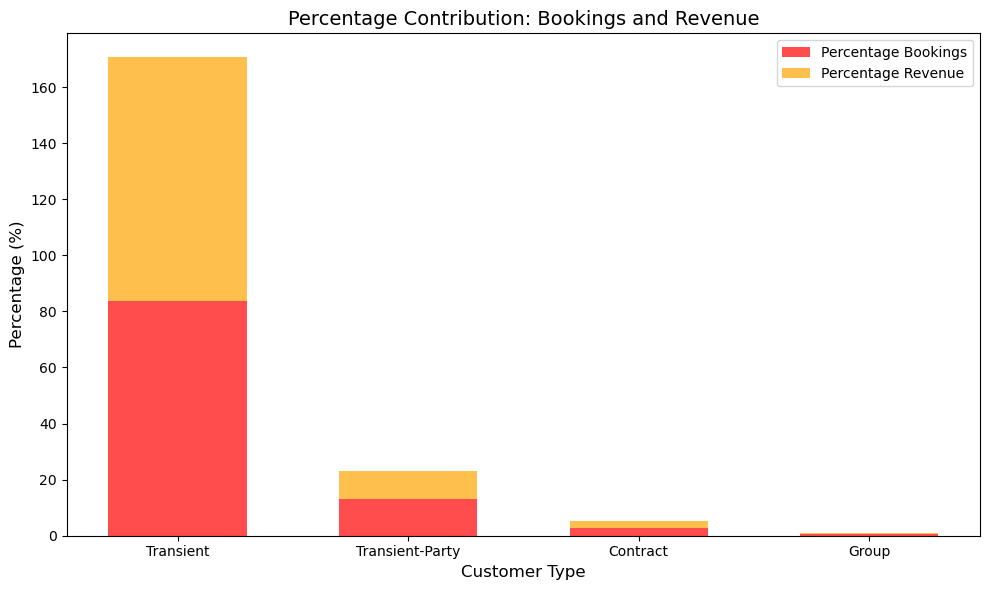

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bars for percentage bookings and revenue
bar_width = 0.6
ax.bar(detailed_customer_analysis.index, detailed_customer_analysis['percentage_bookings'], bar_width, label='Percentage Bookings', color='red', alpha=0.7)
ax.bar(detailed_customer_analysis.index, detailed_customer_analysis['percentage_revenue'], bar_width, bottom=detailed_customer_analysis['percentage_bookings'], label='Percentage Revenue', color='orange', alpha=0.7)

# Labels, title, and legend
ax.set_xlabel('Customer Type', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Percentage Contribution: Bookings and Revenue', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()


# II TÌNH HÌNH HỦY PHÒNG QUA THỜI GIAN

## 1. 